# Chapter: Support Vector Machines & Kernel Methods


# Topic: SVM Binary Classification

In [4]:
import pandas as pd

df = pd.read_csv(r'D:\WORK\Project_Year4\Machine_Learning_for_PM_and_PdM\Chapter12_SVM\toyDataset.csv')
print(df.head())

   1.178862847343031817e+00  1.043650985051199021e+00  \
0                  1.009650                  0.813651   
1                  0.972261                  0.964524   
2                  0.991726                  0.937300   
3                  0.995618                  0.952278   
4                  0.868614                  1.088462   

   -1.000000000000000000e+00  
0                       -1.0  
1                       -1.0  
2                       -1.0  
3                       -1.0  
4                       -1.0  


In [5]:
# read data
import numpy as np

data = np.loadtxt('toyDataset.csv', delimiter=',')
X = data[:, [0, 1]]; y = data[:, 2]

In [6]:
# scale model inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # mean0, std1
X_scaled = scaler.fit_transform(X) 

In [7]:
# fit SVM model
from sklearn.svm import SVC # for large datasets LinearSVC class is preferable

model = SVC(kernel='linear', C=100)
model.fit(X_scaled, y)

SVC(C=100, kernel='linear')

In [8]:
# get details of support vectors
print('# of support vectors:', len(model.support_))

# of support vectors: 3


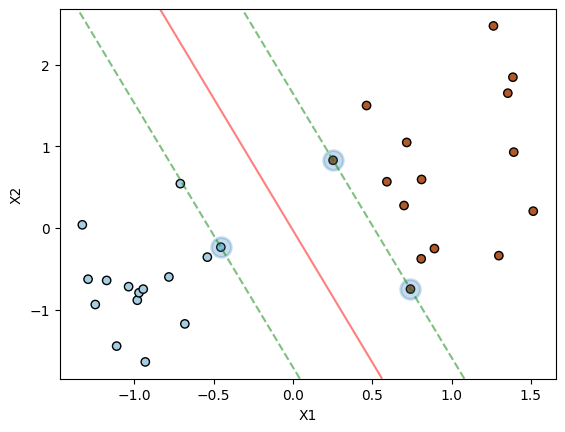

In [9]:
# plot SVM boundaries
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('X1'), plt.ylabel('X2')

# get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and supporting planes
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors=['green', 'red', 'green'])

# highlight support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, linewidth=2, alpha=0.25)
plt.show()


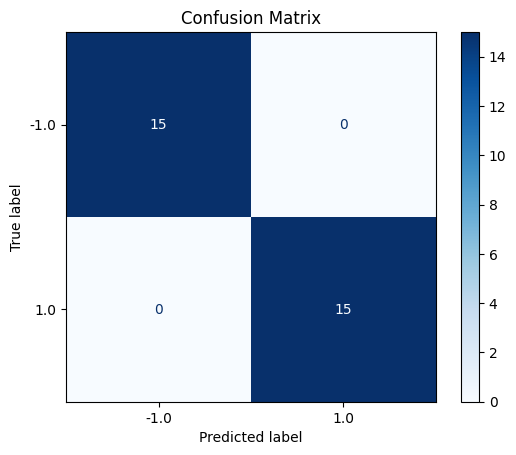

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_scaled )# use x_scaled default
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
